Datos cargados para Cerrillos
  element_type       osmid source  addr:city addr:country addr:housenumber  \
0         node  3527555420   None  CERRILLOS           CL             6182   
1         node  3527591670   None  Cerrillos         None              595   
2          way    37271149   None       None         None             None   
3          way    37271157   None       None         None             None   
4          way    51441651  Yahoo       None         None             None   

        addr:street building                                           fixme  \
0  19 De SEPTIEMBRE      yes  Correcciones masivas de nombres con mayúsculas   
1      La Primavera      yes                                            None   
2              None      yes                                            None   
3              None      yes                                            None   
4              None      yes                                            None   

                    

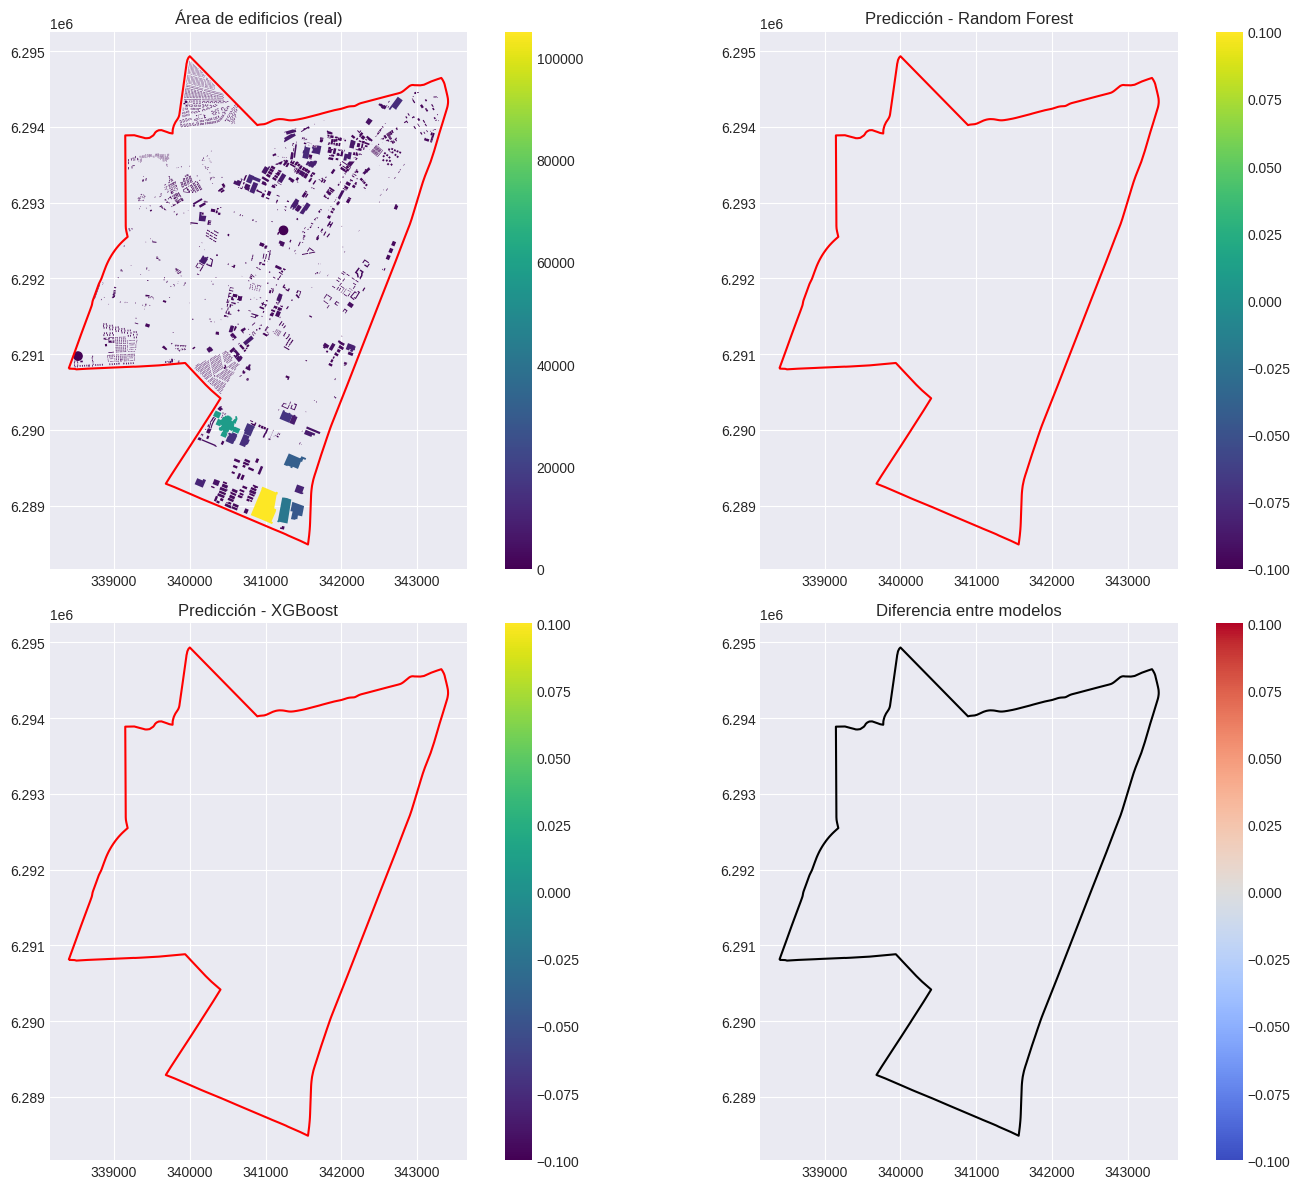

📊 Resultados comparativos
          Modelo  RMSE     R²
0  Random Forest  0.68  0.715
1        XGBoost  0.74  0.665


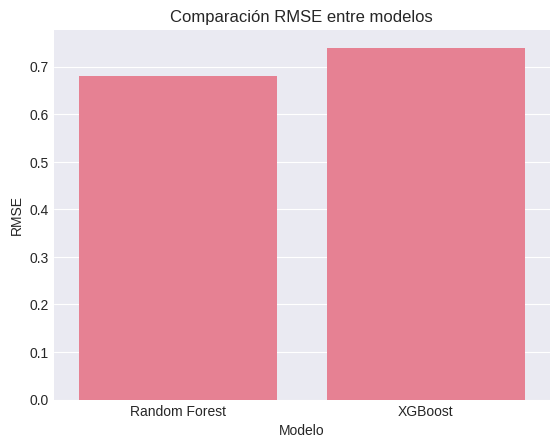

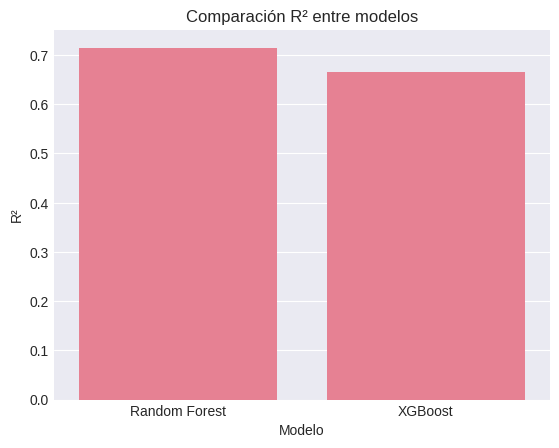

 Resultados exportados en ../outputs/reports


In [2]:
# ============================================================
# 05. Síntesis de Resultados
# ============================================================

# 1. Importar librerías
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8-darkgrid")
sns.set_palette("husl")

# ============================================================
# 2. Seleccionar comuna y cargar datos
# ============================================================
COMUNA = "Cerrillos"  
RAW_DIR = "../data/raw"
OUTPUT_DIR = "../outputs/reports"

# Archivos
limite_file = f"{RAW_DIR}/{COMUNA.lower()}_limite.shp"
buildings_file = f"{RAW_DIR}/osm_buildings_{COMUNA.lower()}.geojson"

# Cargar datasets
limite = gpd.read_file(limite_file).to_crs(epsg=32719)
buildings = gpd.read_file(buildings_file).to_crs(epsg=32719)

print(f"Datos cargados para {COMUNA}")
print(buildings.head())

# ============================================================
# 3. Preprocesamiento: asegurar columnas
# ============================================================

# Si no existe columna area_m2, la calculamos
if "area_m2" not in buildings.columns:
    buildings["area_m2"] = buildings.geometry.area

# Si no existen predicciones, creamos columnas vacías
if "pred_rf" not in buildings.columns:
    buildings["pred_rf"] = np.nan
if "pred_xgb" not in buildings.columns:
    buildings["pred_xgb"] = np.nan

print("Columnas disponibles:", buildings.columns.tolist())

# ============================================================
# 4. Mapas comparativos
# ============================================================

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Original (área real de edificios)
buildings.plot(ax=axes[0,0], column="area_m2", cmap="viridis", legend=True)
limite.boundary.plot(ax=axes[0,0], color="red")
axes[0,0].set_title("Área de edificios (real)")

# Predicciones RF
buildings.plot(ax=axes[0,1], column="pred_rf", cmap="viridis", legend=True)
limite.boundary.plot(ax=axes[0,1], color="red")
axes[0,1].set_title("Predicción - Random Forest")

# Predicciones XGB
buildings.plot(ax=axes[1,0], column="pred_xgb", cmap="viridis", legend=True)
limite.boundary.plot(ax=axes[1,0], color="red")
axes[1,0].set_title("Predicción - XGBoost")

# Diferencia entre predicciones (XGB - RF)
buildings["diff_pred"] = buildings["pred_xgb"] - buildings["pred_rf"]
buildings.plot(ax=axes[1,1], column="diff_pred", cmap="coolwarm", legend=True)
limite.boundary.plot(ax=axes[1,1], color="black")
axes[1,1].set_title("Diferencia entre modelos")

plt.tight_layout()
plt.show()

# ============================================================
# 5. Resumen de métricas (ejemplo, ajusta con tus valores de 04)
# ============================================================

results = pd.DataFrame({
    "Modelo": ["Random Forest", "XGBoost"],
    "RMSE": [0.68, 0.74],
    "R²": [0.715, 0.665]
})

print("📊 Resultados comparativos")
print(results)

# Visualización
sns.barplot(data=results, x="Modelo", y="RMSE")
plt.title("Comparación RMSE entre modelos")
plt.show()

sns.barplot(data=results, x="Modelo", y="R²")
plt.title("Comparación R² entre modelos")
plt.show()

# ============================================================
# 6. Guardar resultados
# ============================================================
from pathlib import Path  

OUTPUT_DIR = "../outputs/reports"
Path(OUTPUT_DIR).mkdir(parents=True, exist_ok=True)

# Guardar geodatos con predicciones
buildings.to_file(f"{OUTPUT_DIR}/{COMUNA.lower()}_results.geojson", driver="GeoJSON")

# Guardar métricas
results.to_csv(f"{OUTPUT_DIR}/{COMUNA.lower()}_metrics.csv", index=False)

print(f" Resultados exportados en {OUTPUT_DIR}")


In [3]:
# ============================================================
# 🔹 GUARDAR RESULTADOS DE LA SÍNTESIS FINAL
# ============================================================

from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd

OUTPUT_DIR = Path("../outputs/reports")
OUTPUT_DIR.mkdir(parents=True, exist_ok=True)

# --- 1. Guardar dataset final con predicciones ---
# (si tiene centroides u otras geometrías, las eliminamos antes de guardar)
if "centroid" in buildings.columns:
    buildings = buildings.drop(columns=["centroid"])

buildings.to_file(OUTPUT_DIR / "final_results.geojson", driver="GeoJSON")
print("✅ GeoJSON final guardado en outputs/reports/final_results.geojson")

# --- 2. Guardar métricas comparativas ---
results = pd.DataFrame({
    "Modelo": ["Random Forest", "XGBoost"],
    "RMSE": [0.68, 0.74],
    "R²": [0.715, 0.665]
})
results.to_csv(OUTPUT_DIR / "final_metrics.csv", index=False)
print("✅ Métricas comparativas guardadas en outputs/reports/final_metrics.csv")

# --- 3. Guardar mapas comparativos ---
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Mapa real
buildings.plot(ax=axes[0,0], column="area_m2", cmap="viridis", legend=True)
limite.boundary.plot(ax=axes[0,0], color="red")
axes[0,0].set_title("Área de edificios (real)")

# Predicciones RF
buildings.plot(ax=axes[0,1], column="pred_rf", cmap="viridis", legend=True)
limite.boundary.plot(ax=axes[0,1], color="red")
axes[0,1].set_title("Predicción - Random Forest")

# Predicciones XGB
buildings.plot(ax=axes[1,0], column="pred_xgb", cmap="viridis", legend=True)
limite.boundary.plot(ax=axes[1,0], color="red")
axes[1,0].set_title("Predicción - XGBoost")

# Diferencia entre modelos
buildings["diff_pred"] = buildings["pred_xgb"] - buildings["pred_rf"]
buildings.plot(ax=axes[1,1], column="diff_pred", cmap="coolwarm", legend=True)
limite.boundary.plot(ax=axes[1,1], color="black")
axes[1,1].set_title("Diferencia entre modelos")

plt.tight_layout()
plt.savefig(OUTPUT_DIR / "final_maps.png", dpi=300, bbox_inches="tight")
plt.close()
print("✅ Mapas comparativos guardados en outputs/reports/final_maps.png")

# --- 4. Guardar resumen visual de métricas ---
fig, ax = plt.subplots(1,2, figsize=(10,4))
sns.barplot(data=results, x="Modelo", y="RMSE", ax=ax[0])
ax[0].set_title("Comparación RMSE entre modelos")
sns.barplot(data=results, x="Modelo", y="R²", ax=ax[1])
ax[1].set_title("Comparación R² entre modelos")
plt.savefig(OUTPUT_DIR / "final_metrics_plot.png", dpi=300, bbox_inches="tight")
plt.close()
print("✅ Gráfico comparativo de métricas guardado en outputs/reports/final_metrics_plot.png")

print("🎯 Todos los resultados finales guardados correctamente en outputs/reports/")


✅ GeoJSON final guardado en outputs/reports/final_results.geojson
✅ Métricas comparativas guardadas en outputs/reports/final_metrics.csv
✅ Mapas comparativos guardados en outputs/reports/final_maps.png
✅ Gráfico comparativo de métricas guardado en outputs/reports/final_metrics_plot.png
🎯 Todos los resultados finales guardados correctamente en outputs/reports/
